In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('train (1).csv')

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [80]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [81]:
df['Age'] = df['Age'].fillna(df['Age'].mean())  

df = df.dropna(subset=['Embarked'])

df = df.drop(columns=['Cabin', 'Name', 'Ticket','PassengerId'])

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q' : 2})

C:\Users\aless\AppData\Local\Temp\ipykernel_5540\111996721.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_matrix.index , y=correlation_matrix.values, palette='coolwarm')


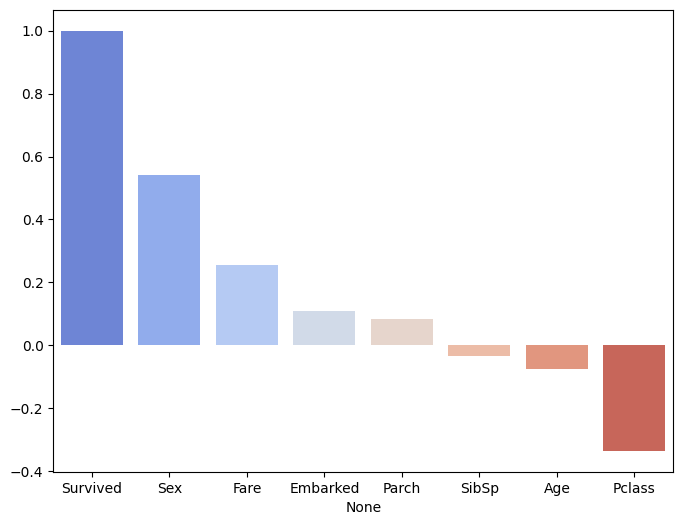

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix  = df.corr()['Survived'].sort_values(ascending=False)


plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_matrix.index , y=correlation_matrix.values, palette='coolwarm')
plt.show()

In [83]:
X = df.drop(columns=['Survived'])  
y = df['Survived'] 

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape
y_train.shape

(711,)

In [85]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

In [86]:
'''from scipy.stats import randint

param_dist = {
    'n_estimators': randint(1, 100),
    'max_depth': randint(2, 15)
}

random_search = RandomizedSearchCV(random_forest, param_distributions=param_dist, n_iter=100, 
                                   cv=5, n_jobs=-1, random_state=42)'''

In [102]:
param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [3, 5, 10, 15]       
}
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, 
                           cv=5, n_jobs=-1)

In [103]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15],
                         'n_estimators': [50, 100, 150]})

In [89]:
# random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B5C8547B00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B5C37C2CF0>},
                   random_state=42)

In [104]:
# print("Best params ", random_search.best_params_)
print("Best params ", grid_search.best_params_)

Best params  {'max_depth': 10, 'n_estimators': 50}


In [90]:
'''best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))'''

Accuracy: 0.7808988764044944
Confusion Matrix:
 [[91 18]
 [21 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       109
           1       0.73      0.70      0.71        69

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [105]:
best_model2 = grid_search.best_estimator_
y_pred = best_model2.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8089887640449438
Confusion Matrix:
 [[94 15]
 [19 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       109
           1       0.77      0.72      0.75        69

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



In [106]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [138]:
import numpy as np
new_passenger = np.array([[2, 0, 22, 0, 0, 7.25, 0]])
prob = best_model2.predict_proba(new_passenger)
print(f"Non sopravvisuto: {prob[0][0]} sopravvisuto : {prob[0][1]}")


Non sopravvisuto: 0.9380081351895148 sopravvisuto : 0.06199186481048551


c:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
